In [2]:
#
#
# Box plot
#
#

In [103]:
# Packages

# data handling
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as mpl
%matplotlib inline

import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors


# paths and loading
import os
from scipy.io import loadmat

In [4]:
# choose variables
data_path = '/Users/cbla0002/Documents/data'

# all
percentiles= ['95th_percentile', '97th_percentile', '99th_percentile']
var_files= ['domain', 'convective_objects', 'aggregation_index', 'examples']
insts = ['IPSL','NOAA-GFDL','NASA-GISS','BCC','CNRM-CERFACS','NCAR'
        ,'NIMR-KMA','BNU','ICHEC','LASG-CESS','MPI-M','CMCC','INM','NCC' 
        ,'CCCma','MIROC','MOHC','MRI','NSF-DOE-NCAR']
vars= ['pr','hus','tas','convective_objects','aggregation_index']
scenarios= ['historical', 'rcp85']


# chosen
percentile= ['97th_percentile']
var_file= ['domain', 'aggregation_index','tas']
inst = ['IPSL']
var= ['pr', 'aggregation_index','tas']
scenario= ['historical','rcp85']

In [5]:
# check variables (domain_pr)
fileName = inst[0] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
#print(file_path)

data1 = loadmat(file_path)
print(data1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'M_lat', 'M_lon', 'Rx1day_pr', 'Rx1day_pr_annual', 'Rx1day_pr_image', 'Rx5day_pr', 'Rx5day_pr_annual', 'Rx5day_pr_image', 'Wlat', 'Wlon', 'area_prctile', 'day_of_snapshot', 'gridbox_5day_pr', 'gridbox_pr', 'lat', 'lat_old', 'lon', 'lon_old', 'mean_pr_image', 'mean_pr_prctile_rate', 'mean_pr_prctile_vol', 'mean_pr_vol', 'prctile_rate_99', 'prctile_rate_99_9', 'prctile_rate_99_99', 'snapshot_pr_image', 'time_range', 'trop_end', 'trop_start'])


In [6]:
# check variables (aggregation_index)
fileName = inst[0] + '_' + var[1] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[1], fileName))
#print(file_path)

data2 = loadmat(file_path)
print(data2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'COP', 'COP_n', 'Number_index', 'Number_index_n', 'ROME', 'ROME_n', 'SCAI', 'SCAI_n'])


In [7]:
# check variables (tas)
fileName = inst[0]+ '_' + var_file[0] + '_' +var[2] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[2], fileName))
#print(file_path)

data3 = loadmat(file_path)
print(data3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'Mean_tas_image', 'Mean_trop_tas', 'lat', 'lon', 'month_snapshot', 'snapshot_trop_tas_image'])


In [8]:
# creating lists of precipitation extremes, aggregation level, and temperature for each model

y= np.zeros(len(insts))
x= np.zeros(len(insts))
T= np.zeros(len(insts))

for i in np.arange(0,len(insts),1):
    # precipitaiton extremes
    fileName = insts[i] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
    data = loadmat(file_path)
    y[i]= np.squeeze(data['Rx1day_pr'])

    # aggregation
    fileName = insts[i] + '_' + var[1] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[1], fileName))
    data = loadmat(file_path)
    x[i]= np.mean(np.squeeze(data['ROME']))

    # temperature
    fileName = insts[i]+ '_' + var_file[0] + '_' +var[2] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[2], fileName))
    data = loadmat(file_path)
    T[i]= np.squeeze(data['Mean_trop_tas'])

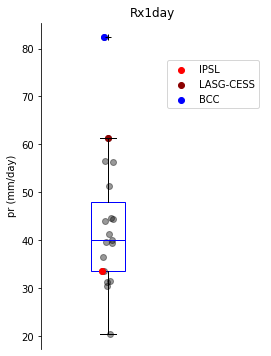

In [107]:
# plot distribution (climatology)
from matplotlib import cm

plt.figure(figsize=(4,6))
plt.xlim(0,1)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))


x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)
#plt.scatter(np.ones(len(y)), y)


x_leg = [insts.index('IPSL'),insts.index('LASG-CESS'),insts.index('BCC')]
label = ['IPSL','LASG-CESS','BCC']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1


plt.xticks([])
plt.title('Rx1day')
plt.ylabel('pr (mm/day)')
plt.legend(bbox_to_anchor=(0.6,0.5,0.4,0.4))

sns.despine(top=True, right=True, left=False, bottom=True)